## Problem 1

The importance sampling estimator is $\hat{\theta_g}= \frac{1}{N} \Sigma_{t=1}^{N}\frac{h(Z_t)\pi(Z_t)}{g(Z_t)}$

Considering a standard normal proposal.

Here $\pi(x) = \frac{1}{\pi(x^2+1)}$, $g(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$ and $h(x) = x$ for estimating mean.

$$
\begin{aligned}
\hat{\theta_g} &= \frac{1}{N} \Sigma_{t=1}^{N} \frac{\frac{Z_t}{\pi(Z_{t}^2+1)}}{\frac{1}{\sqrt{2\pi}}e^{-\frac{Z_{t}^2}{2}}} \\
               &= \frac{\sqrt{2}}{\sqrt{\pi}N} \Sigma_{t=1}^{N} \frac{Z_t e^{\frac{Z_{t}^2}{2}}}{(Z_{t}^2+1)} \\
\end{aligned}
$$

Now, 
$$
\begin{aligned}
Var_g(\hat{\theta_g}) \propto Var_g\left( \frac{Z_1 e^{\frac{Z_{1}^2}{2}}}{Z_{1}^2+1}\right) \text{ which clearly diverges. }
\end{aligned}
$$

Hence, the estimator does not have a finite variance.

<sub><sup>Reference: [this answer](https://stats.stackexchange.com/a/40898)</sup></sub>

---

## Problem 2

#### a)

Since $\sup\frac{f(x)}{g(x)}<\infty$ with $f(x) = a\tilde f(x)$ and $g(x) = b\tilde g(x)$ we can say that $\sup\frac{\tilde f(x)}{\tilde g(x)}<\infty$ or it is finite, making the variance finite as well. 

#### b)

One benefit to using importance sampling to estimate the mean of the target density could be that it produces an estimate for each iteration unlike accept-reject where getting a result is not certain after every iteration.

---

## Problem 3

In [1]:
using Distributions
using Plots
using Random
Random.seed!(1)

TaskLocalRNG()

In [2]:
function getEstimates(N, ν, n)
    t = TDist(ν)
    y = rand(t, n)

    pi(x) = ℯ^(-x^2 / 2) * prod(i -> (1 + ((y[i] - x)^2) / ν)^(-(ν + 1) / 2), 1:n)
    normal(x) = ℯ^(-x^2 / 2) / (sqrt(2 * π))

    nr = 0
    dr = 0
    estimates = zeros(N)

    for i = 1:N
        x = rand(Normal())
        r = pi(x) / normal(x)
        nr += x * r
        dr += r
        estimates[i] = nr / dr
    end
    return estimates
end

getEstimates (generic function with 1 method)

In [3]:
val_5 = getEstimates(100000, 5, 50)
estimate_5 = last(val_5)

0.3217822060502066

In [4]:
val_1 = getEstimates(100000, 1, 50)
estimate_1 = last(val_1)

0.00861307915148276

In [5]:
val_2 = getEstimates(100000, 2, 50)
estimate_2 = last(val_2)

0.18764885687553637

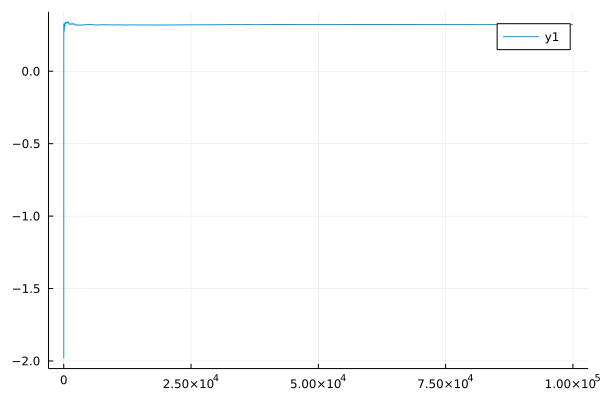

In [6]:
plot(val_5)

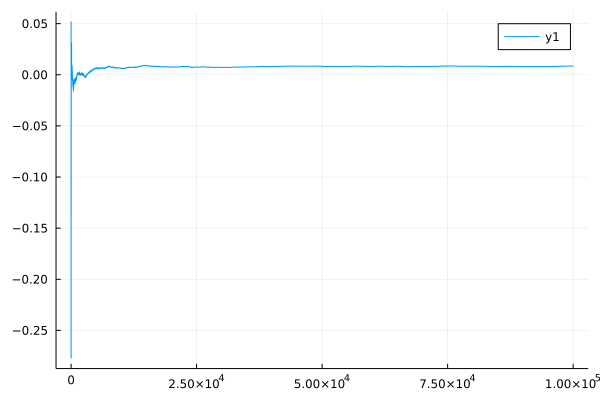

In [7]:
plot(val_1)

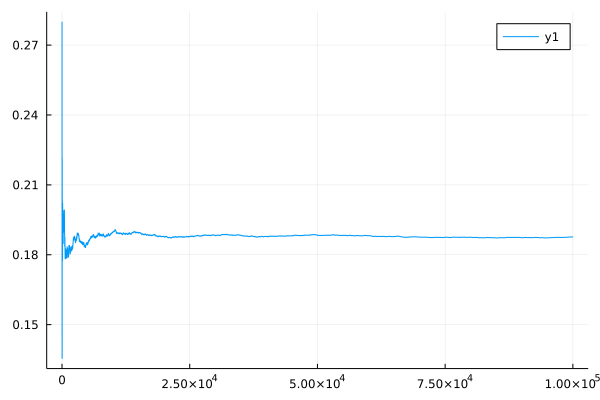

In [8]:
plot(val_2)

It can be seen by plotting the values obtained in each case of estimation that the estimator have finite variance.

---

## Problem 4

$$
\begin{aligned}
    L(Y | \lambda ) &= \prod\limits_{i=1}^{n} \lambda^{y_i} \frac{e^{-\lambda}}{y_i !} \\
                   &= K \lambda^{\Sigma^{n}_{i=1} y_i}e^{-n\lambda} \\
                   &= K \lambda^{n\frac{\Sigma^{n}_{i=1}y_i}{n}}e^{-n\lambda} \\
                   &= K \lambda^{n\bar{y}}e^{-n\lambda} \text{ where } \bar{y} = \frac{\Sigma^{n}_{i=1}y_i}{n}\\
\end{aligned} 
$$

Now, the posterior distribution will be: $L(Y | \lambda ) p(\lambda)$
$$
\begin{aligned}
    L(Y | \lambda) p(\lambda) &= K \lambda^{n\bar{y}}e^{-n\lambda} \frac{\lambda^{\alpha - 1} e^{\frac{-\lambda}{\beta}}}{\beta^{\alpha} \Gamma(\alpha)} \text { where } Gamma(\alpha, \beta) = \frac{\lambda^{\alpha - 1} e^{\frac{-\lambda}{\beta}}}{\beta^{\alpha} \Gamma(\alpha)}\\
                              &= K^{'} \lambda^{n\bar{y}}e^{-n\lambda}\lambda^{\alpha - 1} e^{\frac{-\lambda}{\beta}} \\
                              &= K^{'} \lambda^{n\bar{y} + \alpha - 1}e^{-\lambda (n+ \frac{1}{\beta})} \\
\end{aligned} 
$$

$\therefore$ The posterior distribution of $\lambda$ is: $Gamma(n\bar{y} + \alpha, \frac{\beta}{n\beta + 1})$ 